In [1]:
import seaborn as sn
import matplotlib.pyplot as plot
import numpy as np
import math
import scipy
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
from math import exp, sqrt
from data import Data
print("Set up")

Set up


In [2]:
data = Data("output.txt")
print(f"iterations = {(len(data.frames)-1) * data.skip}")
print(f"N          = {data.n}")
print(f"dt         = {data.dt} s")
print(f"size       = {data.size} m")

iterations = 2250000
N          = 32768
dt         = 1.753333e-15 s
size       = 5e-08 m


In [3]:
data.size / data.n ** (1/3) / data.sigma

5.9410646387832715

In [4]:
data.frames[-1].temperature

3.098214825434149

In [5]:
data.frames[-1].temperature * data.n / data.size ** 3 * data.k

11213.333333333332

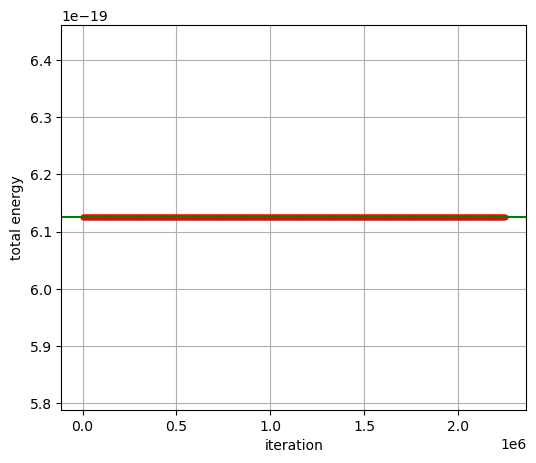

In [6]:
fig = plot.figure(figsize=(6,5))
axes = plot.axes()
axes.grid()
xx, yy = np.array(range(0, len(data.get_total_energies()) * data.skip, data.skip)), np.array(data.get_total_energies())
#xx = xx[2:]
#yy = yy[2:]
axes.plot(xx, yy, '.r')
axes.axhline(data.get_total_energies()[0], color='green')
axes.set_xlabel("iteration")
axes.set_ylabel("total energy")
plot.savefig("plots/total_energy.png")

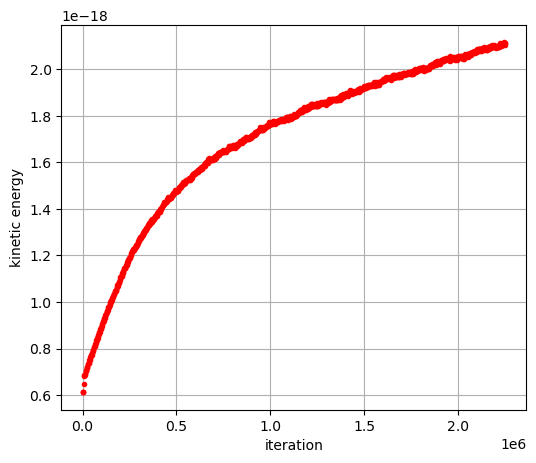

In [7]:
fig = plot.figure(figsize=(6,5))
axes = plot.axes()
xx, yy = np.array(range(0, len(data.get_kinetic_energies()) * data.skip, data.skip)), np.array(data.get_kinetic_energies())
axes.plot(xx, yy, '.r')
axes.grid()
axes.set_xlabel("iteration")
axes.set_ylabel("kinetic energy")
plot.savefig("plots/kinetic_enrgy.png")

/tmp/ipykernel_2183/1795799198.py:22: RuntimeWarning: divide by zero encountered in log
  yy = np.log(yy)


CalledProcessError: Command '['convert', '-size', '640x480', '-depth', '8', '-delay', '50.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'plots/distrln.gif']' returned non-zero exit status 2.

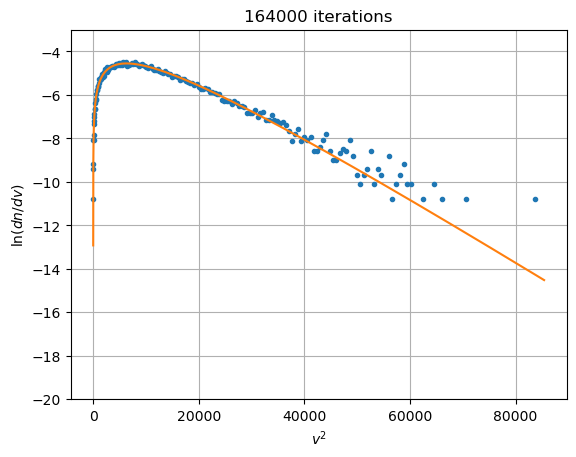

In [8]:
fig = plot.figure()
axes = plot.axes()
line, = axes.plot([], [])
 
def init():
    line.set_data([], [])
    return line,

def animate(i):
    axes.clear()
    axes.set_ylim(-20, -3)
    axes.grid()
    T = data.frames[i].temperature
    axes.set_xlabel("$v^2$")
    axes.set_ylabel("$\ln(dn/dv)$")
    axes.set_title(f"{i * data.skip} iterations")
    
    xx, yy = data.frames[i].get_distribution()
    xx = xx[:200]
    yy = yy[:200] / data.n / data.hist_width
    xx = xx ** 2
    yy = np.log(yy)
    axes.plot(xx, yy, '.')
    
    yy = data.maxwell(np.sqrt(xx), T)
    yy = np.log(yy)
    axes.plot(xx, yy)
    line.set_data(xx, yy)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(data.frames), interval=500, blit=True)
 
anim.save('plots/distrln.gif', writer='imagemagick')

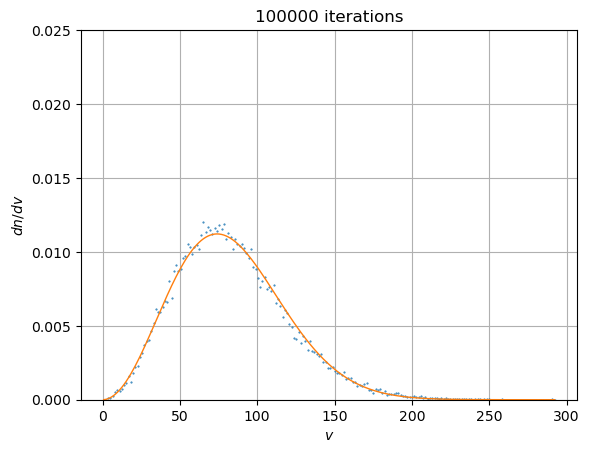

In [6]:
fig = plot.figure()
axes = plot.axes()
line, = axes.plot([], [])
 
def init():
    line.set_data([], [])
    return line,

def animate(i):
    axes.clear()
    axes.grid()
    axes.set_ylim(0, 0.025)
    T = data.frames[i].temperature
    axes.set_xlabel("$v$")
    axes.set_ylabel("$dn/dv$")
    axes.set_title(f"{i * data.skip} iterations")

    xx, yy = data.frames[i].get_distribution()
    xx = xx[:200]
    yy = yy[:200] / data.n / data.hist_width

    axes.plot(xx, yy, '.', markersize=1)
    yy = data.maxwell(xx, T)
    yy = yy
    axes.plot(xx, yy, markersize=1, linewidth=1)
    line.set_data(xx, yy)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(data.frames), interval=500, blit=True)
 
anim.save('plots/distr.gif', writer='imagemagick')